In [6]:
# coding:utf-8
"""
本篇为读取数据库中间表
"""
import pandas as pd
import numpy as np
from impala.dbapi import connect
from impala.util import as_pandas
import cPickle
import re

def easy_print(terms,tname, records=10): #逐条描述前五条记录，方便仔细查看表中值的特征
    conn = connect(host='172.21.1.120', port=21050, user='udms', database='kmi_month') 
    cur = conn.cursor()     
    
    sql = 'SELECT ' + terms + ' FROM ' + tname + ' LIMIT 5' 
    cur.execute(sql)
    read_in = as_pandas(cur)    
    cur.close()
    conn.close()
    
    #print in a format
    columns = read_in.columns.values
    values = read_in.values
    records = []
    for v in values:
        records.append(zip(columns, v))
    
    for ix,r in enumerate(records):
        print('----------第%s条记录--------' % (ix+1))
        for k, v in r:
            print('%s: %s' % (k, v))
            
def full_print(terms,tname): #打出全表所选列，以方便进行统计查看规律，决定处理方法
    conn = connect(host='172.21.1.120', port=21050, user='udms', database='kmi_month') 
    cur = conn.cursor()     
    
    sql = 'SELECT ' + terms + ' FROM ' + tname
    cur.execute(sql)
    df = as_pandas(cur)
    print df
    cur.close()
    conn.close()

def merge_table(df1,df2,term1,term2):
    df = pd.merge(df1,df2,how='outer',left_on=term1,right_on=term2)
    return df    
def convert_int(data):
    return int(data)

    
def read_in():
    conn = connect(host='172.21.1.120', port=21050, user='udms', database='kmi_month') 
    cur = conn.cursor()
    sql = 'SELECT * FROM Desx'
    cur.execute(sql)
    df = as_pandas(cur)
    cur.close()
    conn.close()    
    return df

In [7]:
df = read_in()

In [8]:
df.head()

,customer_id,des_charge_sum,des_procharge_sum,des_reduce_sum,des_realcharge_sum,des_charge_mean,des_realcharge_mean,des_charge_max,des_realcharge_max,des_charge_min,des_realcharge_min,des_cnt,des_guestnumber_max,des_guestnumber_min,des_guestnumber_mean,des_work_cnt,des_work_realchargesum,des_week_cnt,des_week_realchargesum
0,5745380,179.000000,179.000000,0.000000,179.0,179.000000,179.0,179.000000,179.0,179.000000,179.0,1,1,1,1,1,179.0,0,0.0
1,5745834,24.000000,24.000000,0.000000,24.0,24.000000,24.0,24.000000,24.0,24.000000,24.0,1,4,4,4,1,24.0,0,0.0
2,5895073,12.666667,12.666667,1.666667,11.0,12.666667,11.0,12.666667,11.0,12.666667,11.0,1,3,3,3,1,11.0,0,0.0
3,5686084,35.800000,35.800000,0.000000,35.8,35.800000,35.8,35.800000,35.8,35.800000,35.8,1,10,10,10,1,35.8,0,0.0
4,3576104,4.500000,4.500000,0.000000,4.5,4.500000,4.5,4.500000,4.5,4.500000,4.5,1,8,8,8,0,0.0,1,4.5


In [3]:
df.shape

(1174, 41)

## Descompany

In [37]:
df.shape

(936, 5)

## shop22

In [33]:
df.head()

,openid,shop_cnt,shop_morning_cnt,shop_morning_sum,shop_afternoon_cnt,shop_afternoon_sum,shop_evening_cnt,shop_evening_sum,shop_wine_rate,shop_cigarette_rate,...,shop_real_min,shop_consistency,shop_work_cnt,shop_work_sum,shop_week_cnt,shop_week_sum,shop_fre_cnt,shop_fre_companyid,shop_order_num,shop_cross_com
0,otCz6vmL_CBxZaMvrf9ZbgRFjr9k,1,1,0,1,0,1,20,0,0,...,20,1,1,20,0,0,1,1090,1,0
1,otCz6vmXnp7sH_L-Tkd6quZXcE-w,1,1,0,1,0,1,12,0,0,...,12,1,0,0,1,12,1,2054,1,0
2,otCz6vnszvwznyCMZgeNTRJBtvAY,1,1,0,1,298,1,0,0,0,...,298,1,0,0,1,298,1,3170,1,0
3,otCz6vo1EY_K1UbycK-sFUoJA4zY,2,2,0,2,0,2,1062,0,0,...,408,2,2,1062,0,0,2,3170,2,0
4,otCz6vjDyWmnnMBiTAuyFMvYXIQA,1,1,0,1,0,1,60,0,0,...,60,1,1,60,0,0,1,4952,1,0


In [34]:
df.shape

(9479, 30)

In [3]:
df.head()

,onlineorderid,orderno,orderdate,openid,kmid,ordertype,ordersourceid,companyid,roomid,orderdatetime,...,consumedatetime,consumeguest,refunddatetime,refundsake,servicestaff,isdelete,quitonlineorderid,synsign,opencheckoutid,orderactivitytype
0,162174,036241462032011986163,2016-05-01,otCz6vuvHDJ85-TaKNWF0JsOdWQY,,2,1,4067,-1,2016-05-01 00:00:12,...,0000-00-00 00:00:00,null,0000-00-00 00:00:00,null,在线超市点单,1,0,0,-1,1
1,162175,075571462032024678504,2016-05-01,otCz6viP33TOAqZTkVgdWpZ-HdK8,,2,1,8005,-1,2016-05-01 00:00:25,...,0000-00-00 00:00:00,null,0000-00-00 00:00:00,null,在线超市点单,1,0,0,-1,1
2,162176,002741462032047912863,2016-05-01,otCz6viP33TOAqZTkVgdWpZ-HdK8,000033047,2,1,180,-1,2016-05-01 00:00:48,...,0000-00-00 00:00:00,null,0000-00-00 00:00:00,null,在线超市点单,1,0,0,-1,3
3,162177,044951462032078468679,2016-05-01,otCz6vsMS6EqeZFPkorYgb9o0dTk,,1,1,4938,0084,2016-05-01 00:01:18,...,0000-00-00 00:00:00,null,0000-00-00 00:00:00,null,在线超市点单,1,0,0,364505,1
4,162178,012011462032137018376,2016-05-01,otCz6vsvZ6WW7akf32RI6QQ3ijoo,,2,1,1118,-1,2016-05-01 00:02:17,...,0000-00-00 00:00:00,null,0000-00-00 00:00:00,null,在线超市点单,1,0,0,-1,1


In [6]:
pd.value_counts(df['openid'])

otCz6vhH5d8-V_OPTdubi7YrMK-E    352
otCz6vktrf-e2YKTCiqXynD3ohkA    258
otCz6vleK-cw38IWPzyVvCjY_eeA    249
otCz6vlN20oRdNWD6zwRv5kvfHxQ    237
otCz6vsDsRiyI8ZLORjqa5gnmL2g    225
otCz6vsdAD08cC2-tN_0Qrh-SmPc    193
otCz6vjrSfAPxnAHWvXV4JPtv8gM    163
otCz6viB0ThN38ZZ3k4h9t63latg    138
otCz6vi5f9WsNC3wkGa9D1uruuKQ    127
otCz6vlTYw1V5Jhcie1hUfzgUdso    126
otCz6vpta9cjjK27Zb3mf221wVFo    119
otCz6vkbnr_43vywRp0vM1LdUaS0    112
otCz6vnKN_Avt_ZQ19MVlSBbLMY0    107
otCz6vsu8LJCw_hh0gH2jQM7J5vQ    105
otCz6vu9zoByvs_W2qS6KLeYb_Dg    104
otCz6vlCWiuNhjhSd4P-FVRes0Sc    101
otCz6vs0kdZXLJ4BSSiHbarqZ0Us     99
otCz6vhCPNfyNaavyECkuA0DaElM     93
otCz6vsFzukG3j2n8wHRhLgEUW-A     89
otCz6vpDxdOzbtBkpZvV56IzkuJg     88
otCz6vpH5x3S_VUmf6NZVbBzzLCE     85
otCz6vpZuztxREKGFjYwGDTIFARY     84
otCz6vtnpV52gvyoYNMCIzLJC9oY     84
otCz6viP33TOAqZTkVgdWpZ-HdK8     83
otCz6vldP9d_niJlQub33tNBhi60     80
otCz6vhsMA3SEimwmbUO8RZULa0I     80
otCz6vhAhxwk8K6WnuaoQomI1myU     78
otCz6vpZX8W4qJsSO3mrua8bW6V8

In [54]:
pd.value_counts(df['shop_cross_com'])

0    9422
1      57
Name: shop_cross_com, dtype: int64

In [55]:
df.shape

(9479, 30)

## shop

In [5]:
df.head()

,openid,shop_cnt,shop_morning_cnt,shop_morning_sum,shop_afternoon_cnt,shop_afternoon_sum,shop_evening_cnt,shop_evening_sum,shop_wine_rate,shop_cigarette_rate,...,shop_week_cnt,shop_week_sum,shop_fre_cnt,shop_fre_companyid,shop_order_num,shop_cross_com,shop_fre_com_roomnum,shop_fre_com_managetype,shop_fre_com_vodsystemtype,shop_fre_com_regioncode
0,otCz6vovTqolYco9Y4i4SDMMJ7Ts,1,1,0,1,0,1,306,0,0,...,0,0,1,5653,1,0,169,1,0,440000
1,otCz6vguKDqXAjURCKcgYVc78jcg,1,1,0,1,154,1,0,0,0,...,0,0,1,6491,1,0,74,1,0,440000
2,otCz6vrb8lId0lHluEG1cmwoiQqg,2,2,0,2,0,2,575,0,0,...,0,0,2,1125,2,0,60,1,0,350000
3,otCz6vosNwgZyu-9IMOiuWCrzL-k,2,2,0,2,0,2,966,0,0,...,0,0,2,2710,2,0,113,1,0,310000
4,otCz6vnvnVwYcmlgeesCXCRDma8Q,1,1,0,1,22,1,0,0,0,...,1,22,3,1118,3,0,60,1,0,500000


In [6]:
df.shape

(49988, 34)

In [7]:
df.columns

Index([u'openid', u'shop_cnt', u'shop_morning_cnt', u'shop_morning_sum',
       u'shop_afternoon_cnt', u'shop_afternoon_sum', u'shop_evening_cnt',
       u'shop_evening_sum', u'shop_wine_rate', u'shop_cigarette_rate',
       u'shop_sum', u'shop_wine', u'shop_cigarette', u'shop_cheapie',
       u'shop_avg', u'shop_max', u'shop_min', u'shop_real_sum',
       u'shop_real_avg', u'shop_real_max', u'shop_real_min',
       u'shop_consistency', u'shop_work_cnt', u'shop_work_sum',
       u'shop_week_cnt', u'shop_week_sum', u'shop_fre_cnt',
       u'shop_fre_companyid', u'shop_order_num', u'shop_cross_com',
       u'shop_fre_com_roomnum', u'shop_fre_com_managetype',
       u'shop_fre_com_vodsystemtype', u'shop_fre_com_regioncode'],
      dtype='object')

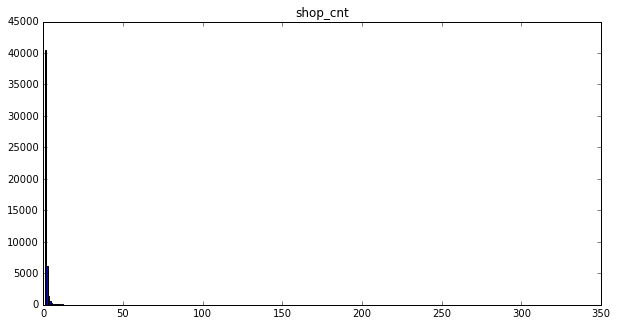

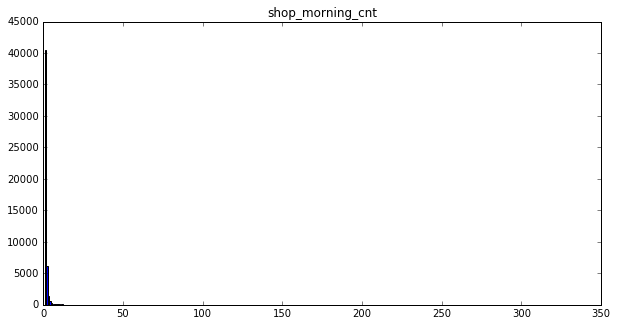

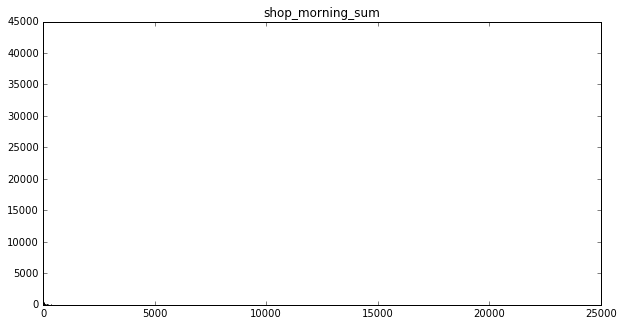

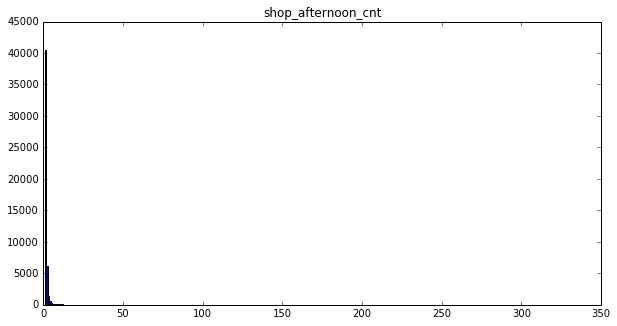

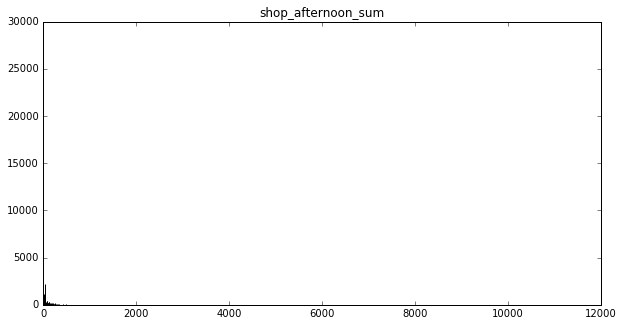

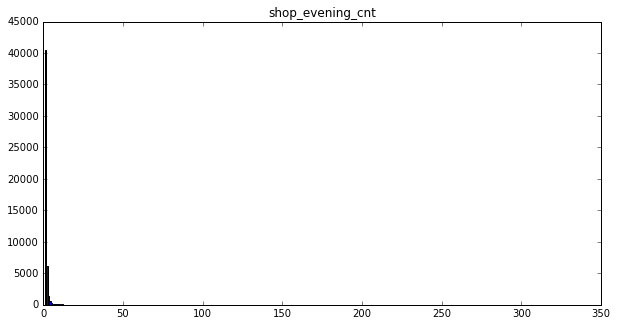

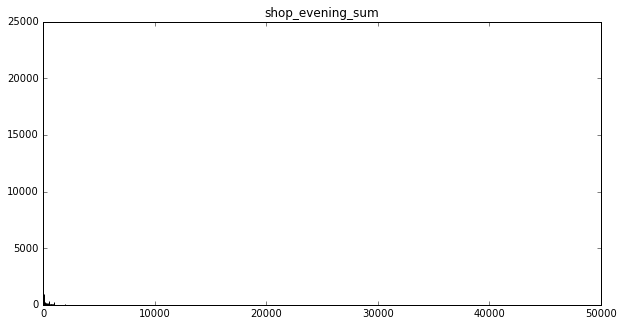

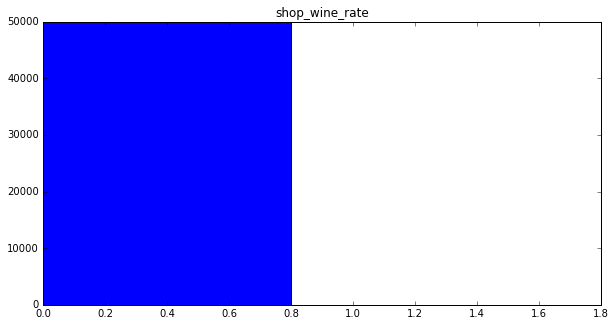

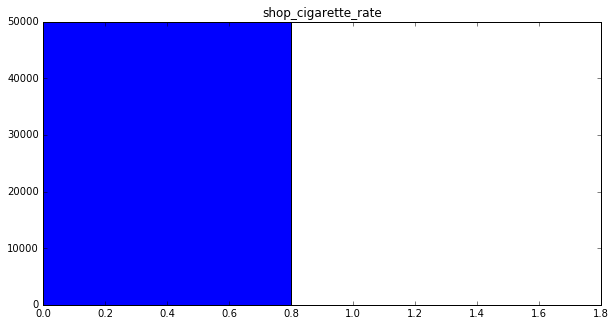

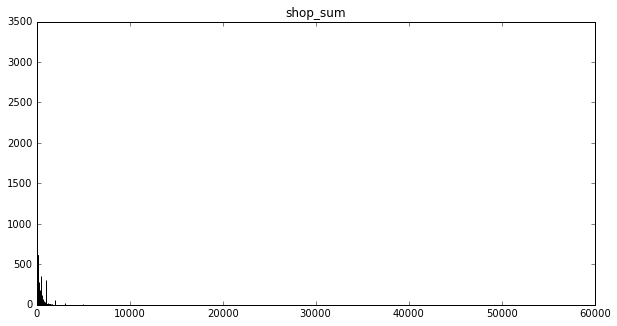

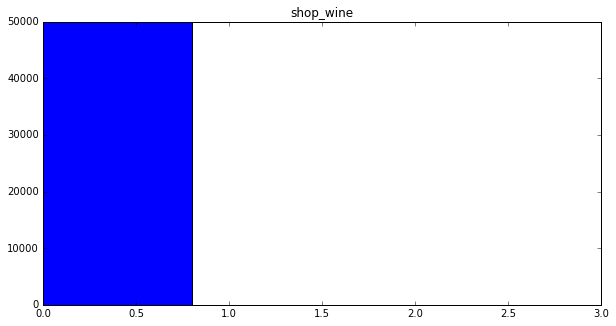

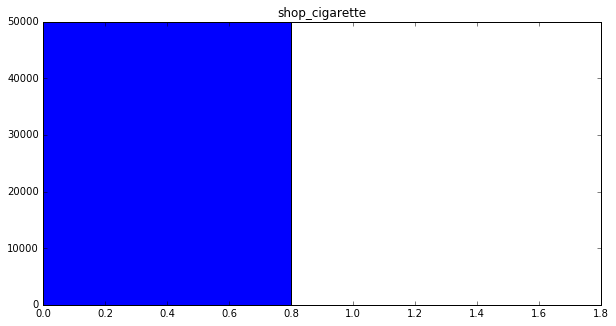

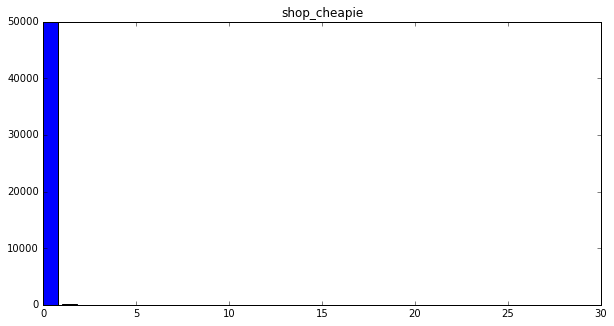

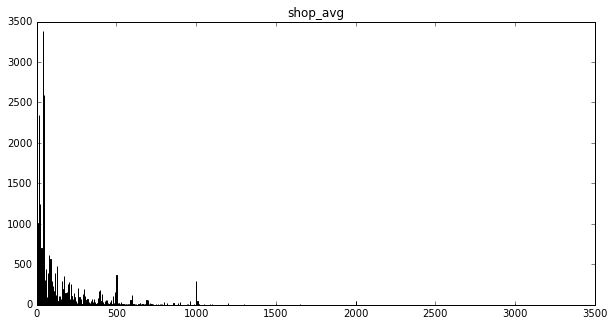

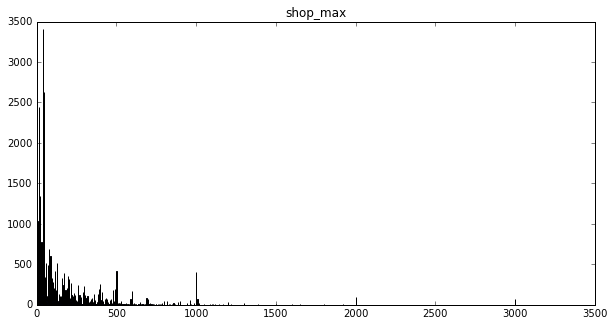

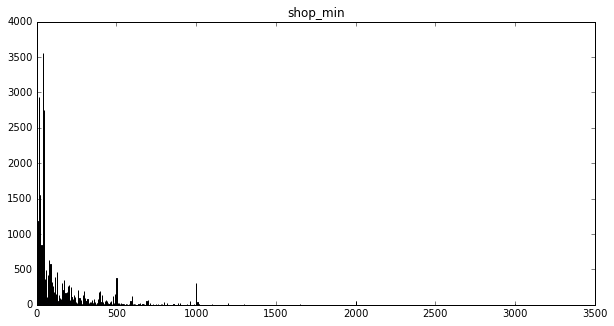

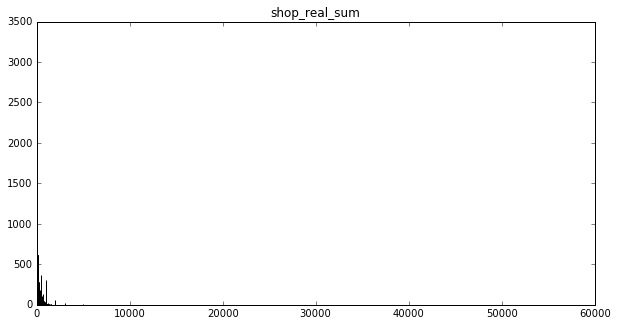

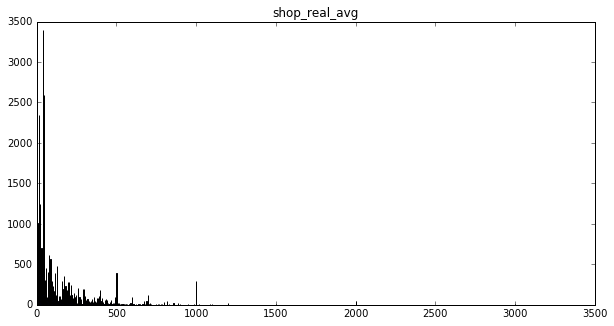

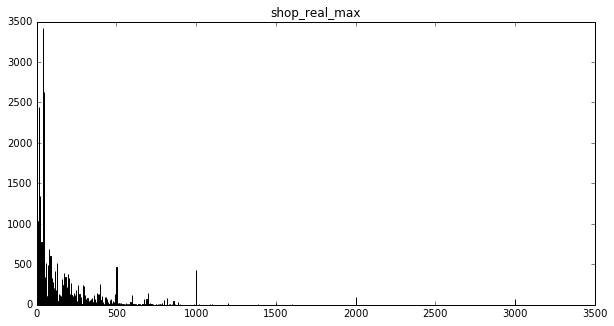

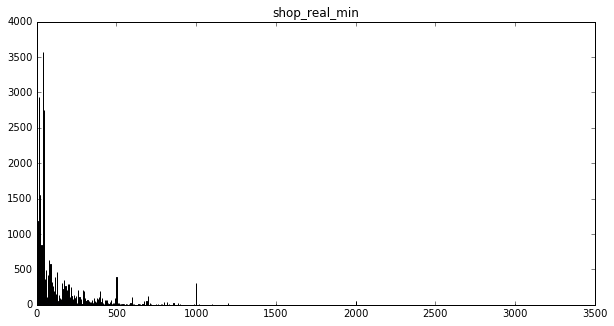

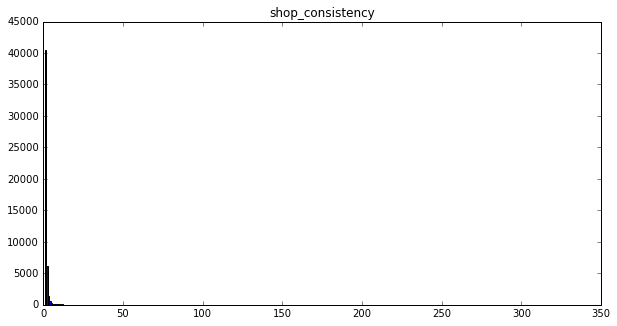

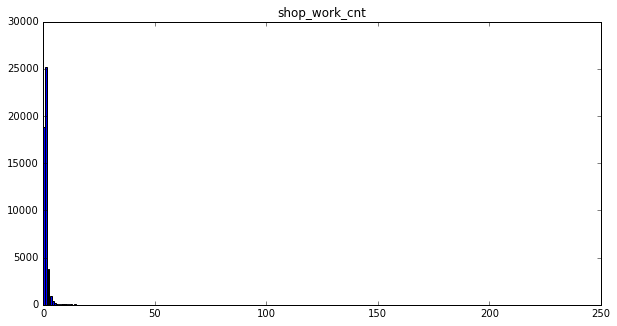

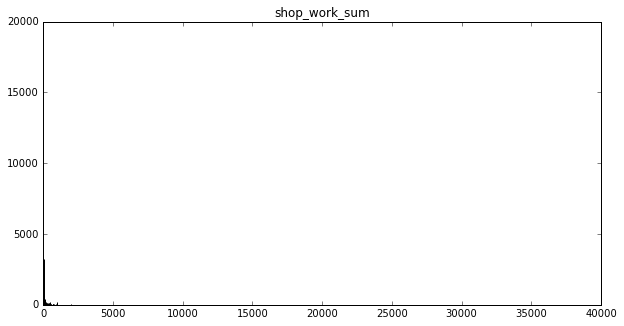

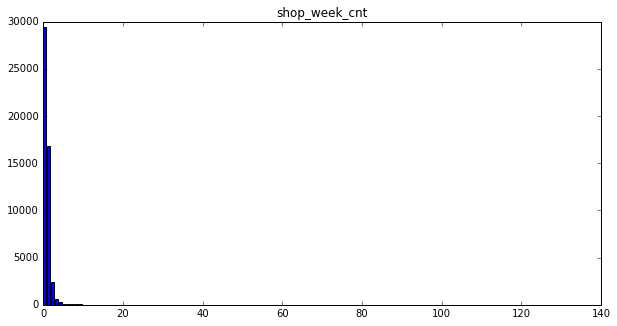

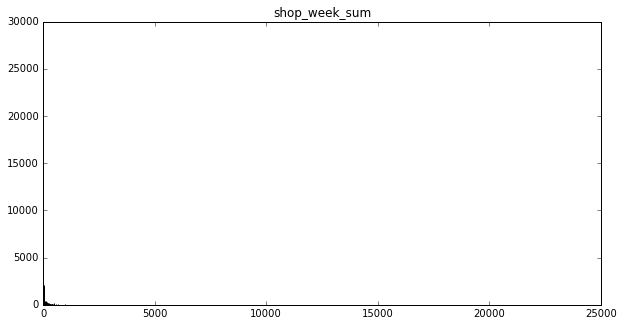

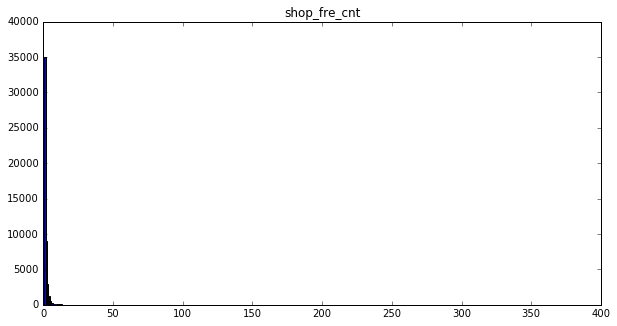

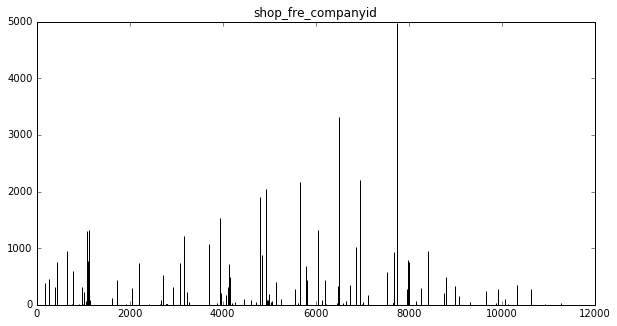

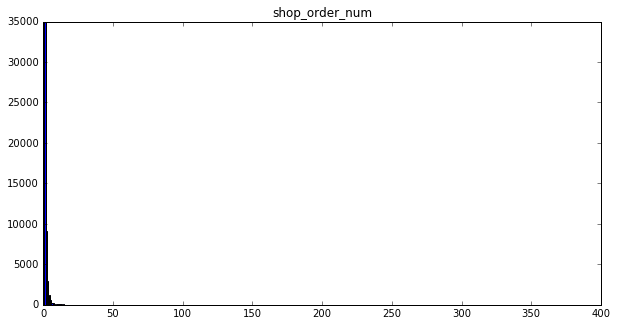

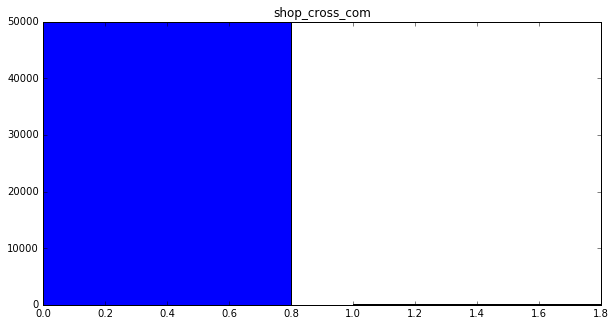

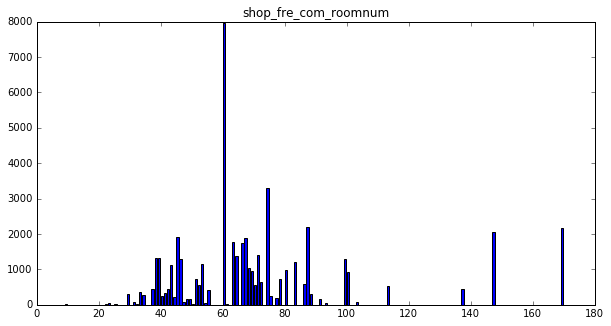

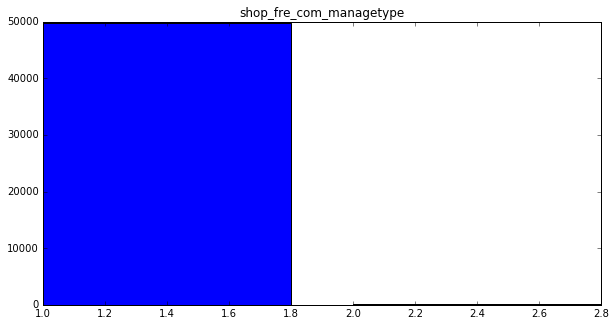

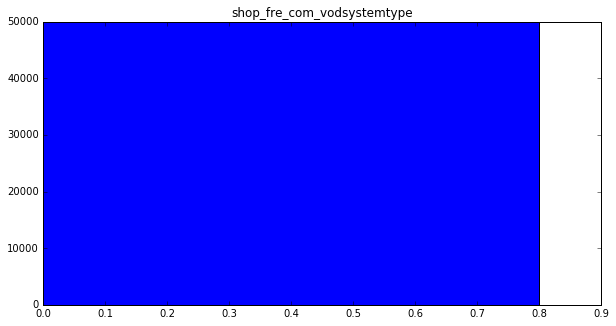

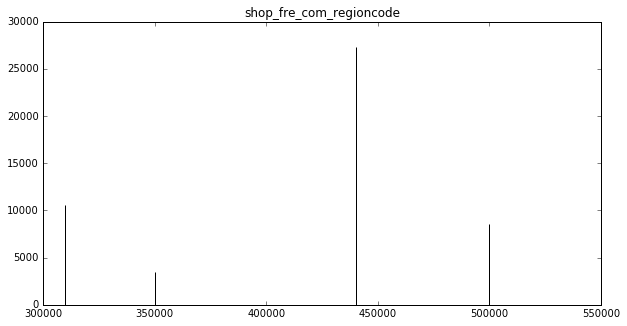

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

j=1
for i in df.columns[1:]:
    plt.figure(figsize=(10,200),dpi=80)
    plt.subplot(33,1,j)
    count = pd.value_counts(df[i])
    index = count.index.values
    values = count.values
    plt.bar(index, values)
    plt.title(i)
    j+=1
    plt.show()

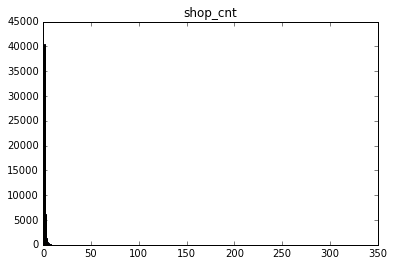

In [37]:
%matplotlib inline
import matplotlib.pylab as mtp

count = pd.value_counts(df['shop_cnt'])
index = count.index.values
values = count.values
mtp.bar(index,values)
mtp.title('shop_cnt')


In [22]:
pd.value_counts(df['shop_cnt'])

1      40509
2       6132
3       1459
4        593
5        285
6        171
7        102
8         88
10        57
11        55
12        54
9         53
14        43
13        30
18        28
19        28
20        27
15        27
17        26
22        18
25        17
27        16
16        16
21        14
24        13
23        13
26        10
29         7
28         6
35         5
       ...  
69         1
38         1
136        1
101        1
63         1
105        1
340        1
93         1
61         1
220        1
251        1
59         1
218        1
58         1
57         1
56         1
118        1
116        1
74         1
84         1
52         1
147        1
83         1
242        1
112        1
77         1
45         1
76         1
106        1
79         1
Name: shop_cnt, dtype: int64

In [50]:
for i in df.columns[1:]:
    print i
    print pd.value_counts(df[i])

shop_cnt
1      40509
2       6132
3       1459
4        593
5        285
6        171
7        102
8         88
10        57
11        55
12        54
9         53
14        43
13        30
18        28
19        28
20        27
15        27
17        26
22        18
25        17
27        16
16        16
21        14
24        13
23        13
26        10
29         7
28         6
35         5
       ...  
69         1
38         1
136        1
101        1
63         1
105        1
340        1
93         1
61         1
220        1
251        1
59         1
218        1
58         1
57         1
56         1
118        1
116        1
74         1
84         1
52         1
147        1
83         1
242        1
112        1
77         1
45         1
76         1
106        1
79         1
Name: shop_cnt, dtype: int64
shop_morning_cnt
1      40509
2       6132
3       1459
4        593
5        285
6        171
7        102
8         88
10        57
11        55
12        54
9        